In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm
from pygments.styles.dracula import yellow
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, HistGradientBoostingRegressor, \
    StackingRegressor, GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, root_mean_squared_error, accuracy_score, f1_score, r2_score, \
    recall_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sympy.abc import alpha

font_path = "C:\\Windows\\Fonts\\H2GTRM.TTF" # ÏúàÎèÑÏö∞OS Ìè∞Ìä∏Í≤ΩÎ°ú
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # Ìè∞Ìä∏Î™Ö
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False) # matplotlibÏù¥ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Ïú†ÎãàÏΩîÎìú ÎßàÏù¥ÎÑàÏä§ ÎπÑÌôúÏÑ±Ìôî, ÏïÑÏä§ÌÇ§ÏΩîÎìú ÎßàÏù¥ÎÑàÏä§ ÏÇ¨Ïö©)

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú

In [3]:

commerce_df = pd.read_csv('data/CommerceData.csv')

## Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÎ≥¥ ÌôïÏù∏

In [3]:
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Îç∞Ïù¥ÌÑ∞ÏÖã ÌÜµÍ≥Ñ ÌôïÏù∏

In [78]:

commerce_df.describe(include='all')

CustomerID        Churn       Tenure PreferredLoginDevice  \
count    5630.000000  5630.000000  5366.000000                 5630   
unique           NaN          NaN          NaN                    3   
top              NaN          NaN          NaN         Mobile Phone   
freq             NaN          NaN          NaN                 2765   
mean    52815.500000     0.168384    10.189899                  NaN   
std      1625.385339     0.374240     8.557241                  NaN   
min     50001.000000     0.000000     0.000000                  NaN   
25%     51408.250000     0.000000     2.000000                  NaN   
50%     52815.500000     0.000000     9.000000                  NaN   
75%     54222.750000     0.000000    16.000000                  NaN   
max     55630.000000     1.000000    61.000000                  NaN   

           CityTier  WarehouseToHome PreferredPaymentMode Gender  \
count   5630.000000      5379.000000                 5630   5630   
unique          NaN              NaN                    7      2   
top             NaN              NaN           Debit Card   Male   
freq            NaN              NaN                 2314   3384   
mean       1.654707        15.639896                  NaN    NaN   
std        0.915389         8.531475                  NaN    NaN   
min        1.000000         5.000000                  NaN    NaN   
25%        1.000000         9.000000                  NaN    NaN   
50%        1.000000        14.000000                  NaN    NaN   
75%        3.000000        20.000000                  NaN    NaN   
max        3.000000       127.000000                  NaN    NaN   

        HourSpendOnApp  NumberOfDeviceRegistered    PreferedOrderCat  \
count      5375.000000               5630.000000                5630   
unique             NaN                       NaN                   6   
top                NaN                       NaN  Laptop & Accessory   
freq               NaN                       NaN                2050   
mean          2.931535                  3.688988                 NaN   
std           0.721926                  1.023999                 NaN   
min           0.000000                  1.000000                 NaN   
25%           2.000000                  3.000000                 NaN   
50%           3.000000                  4.000000                 NaN   
75%           3.000000                  4.000000                 NaN   
max           5.000000                  6.000000                 NaN   

        SatisfactionScore MaritalStatus  NumberOfAddress     Complain  \
count         5630.000000          5630      5630.000000  5630.000000   
unique                NaN             3              NaN          NaN   
top                   NaN       Married              NaN          NaN   
freq                  NaN          2986              NaN          NaN   
mean             3.066785           NaN         4.214032     0.284902   
std              1.380194           NaN         2.583586     0.451408   
min              1.000000           NaN         1.000000     0.000000   
25%              2.000000           NaN         2.000000     0.000000   
50%              3.000000           NaN         3.000000     0.000000   
75%              4.000000           NaN         6.000000     1.000000   
max              5.000000           NaN        22.000000     1.000000   

        OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                   5365.000000  5374.000000  5372.000000   
unique                          NaN          NaN          NaN   
top                             NaN          NaN          NaN   
freq                            NaN          NaN          NaN   
mean                      15.707922     1.751023     3.008004   
std                        3.675485     1.894621     2.939680   
min                       11.000000     0.000000     1.000000   
25%                       13.000000     1.000000     1.000000   
50%          

## Í≤∞Ï∂ïÏπò Ï≤¥ÌÅ¨

In [79]:
# Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò Ïàò ÌôïÏù∏
null_df = commerce_df.isnull().sum()

# 1Í∞ú Ïù¥ÏÉÅ Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÎßå Î≥¥Í∏∞
null_df[null_df > 0]

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [6]:
null_df

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Î≥µÏÇ¨Î≥∏ ÏûëÏóÖ
df = commerce_df.copy()

# 1. Í≤∞Ï∂ïÏπò Ï≤òÎ¶¨
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())

df['NoLastYearPurchase'] = df['OrderAmountHikeFromlastYear'].isna().astype(int)
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(0)

df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['OrderCount'] = df['OrderCount'].fillna(0)

# NeverOrderedÎ°úÎäî Íµ¨Î∂ÑÌïòÍ≥†,
# DaySinceLastOrderÎäî Î™ÖÌôïÌûà ÌÅ∞ Í∞í (ex. ÏµúÎåÄÍ∞í + 1) ÏúºÎ°ú Ï±ÑÏõåÏÑú Î™®Îç∏Ïù¥ Íµ¨Î∂Ñ Í∞ÄÎä•ÌïòÍ≤åÎÅî ÏÑ§Ï†ï
max_day = df['DaySinceLastOrder'].max()
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(max_day + 1)
df['NeverOrdered'] = (df['DaySinceLastOrder'] > max_day).astype(int)

# 2. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî©
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
            'PreferedOrderCat', 'MaritalStatus']

# ÎÇòÏ§ëÏóê ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º Ïù∏ÏΩîÎî©Ìï†Îïå ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï†ÄÏû•Ìï¥ÎëêÍ∏∞.
le_dict = {}
# for col in cat_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     le_dict[col] = le

# 2. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî© (OneHot)
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
            'PreferedOrderCat', 'MaritalStatus']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 3. ID Ï†úÍ±∞
df.drop(columns=['CustomerID'], inplace=True)


In [5]:
# Ïù∏ÏΩîÎçî Ï†ÄÏû•Ìïú dict
le_dict

{}

## ÌïôÏäµ, ÌèâÍ∞ÄÏÖã Î∂ÑÎ¶¨ & Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. train/test Î∂ÑÎ¶¨ (Ïä§ÏºÄÏùºÎßÅ Ï†ÑÏóê Î∂ÑÎ¶¨)
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Ïó∞ÏÜçÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉùÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï†úÏô∏Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏ Ï†ïÏùò
exclude = ['NeverOrdered', 'CityTier', 'PreferredPaymentMode', 'Gender',
           'PreferedOrderCat', 'MaritalStatus', 'PreferredLoginDevice']

# Ï†ïÏàòÌòï, Ïã§ÏàòÌòï Ïª¨Îüº Ï§ëÏóêÏÑú exclude Ïª¨Îüº Ï†úÏô∏Ìïú Ïª¨Îüº ÎΩëÍ∏∞
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.difference(exclude)

# 3. Ïä§ÏºÄÏùºÎü¨ ÏÑ†Ïñ∏ Î∞è ÌïôÏäµ
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Î™®Îç∏Î≥Ñ ÌïôÏäµ, ÌèâÍ∞Ä ÏßÑÌñâ

## RandomForest

In [8]:
# RandomForest Í∏∞Î≥∏ Î≤ÑÏ†Ñ

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RandomForest (Standard Scaling)")
print(f"test accuracy: {rf.score(X_test, y_test)}")
print(f"train accuracy: {rf.score(X_train, y_train)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

RandomForest (Standard Scaling)
test accuracy: 0.9760213143872114
train accuracy: 1.0
f1 score: 0.923943661971831
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 0.8631578947368421
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       936
           1       0.99      0.86      0.92       190

    accuracy                           0.98      1126
   macro avg       0.98      0.93      0.95      1126
weighted avg       0.98      0.98      0.98      1126



In [83]:
# RandomForest ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú® 1Î°ú ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ÏÑú threshold ÏßÄÏ†ïÌïú Î≤ÑÏ†Ñ
# Ïù¥ÌÉà ÌôïÎ•†Ïù¥ Ï°∞Í∏àÏù¥ÎùºÎèÑ ÏûàÎäî Í≥†Í∞ùÏùÑ ÏãùÎ≥ÑÌïòÍ∏∞ ÏúÑÌï®.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
# ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall Ï†êÏàòÍ∞Ä 1Ïù¥Î©¥ÏÑú Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏïòÎçò threshold = 0.285
threshold = 0.269
y_pred1 = (y_pred_proba > threshold).astype(int)

print("RandomForest (Standard Scaling)")
print(f"accuracy: {accuracy_score(y_test, y_pred1)}")
print(f"f1 score: {f1_score(y_test, y_pred1)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred1)}")
print(classification_report(y_test, y_pred1)) # ÏñëÏÑ± ÌÅ¥ÎûòÏä§ precisionÏù¥ 0.87Î°ú Ï°∞Í∏à ÏïÑÏâ¨ÏõÄ. (ÏñëÏÑ± ÌÅ¥ÎûòÏä§ÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤É Ï§ë, Ïã§Ï†ú ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïù∏ ÌôïÎ•†)

RandomForest (Standard Scaling)
accuracy: 0.9671403197158082
f1 score: 0.9112709832134293
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 1.0
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       936
           1       0.84      1.00      0.91       190

    accuracy                           0.97      1126
   macro avg       0.92      0.98      0.95      1126
weighted avg       0.97      0.97      0.97      1126



In [186]:
import joblib

joblib.dump(rf, 'models/random_forest_model(threshold=0.285).pkl')

['models/random_forest_model(threshold=0.285).pkl']

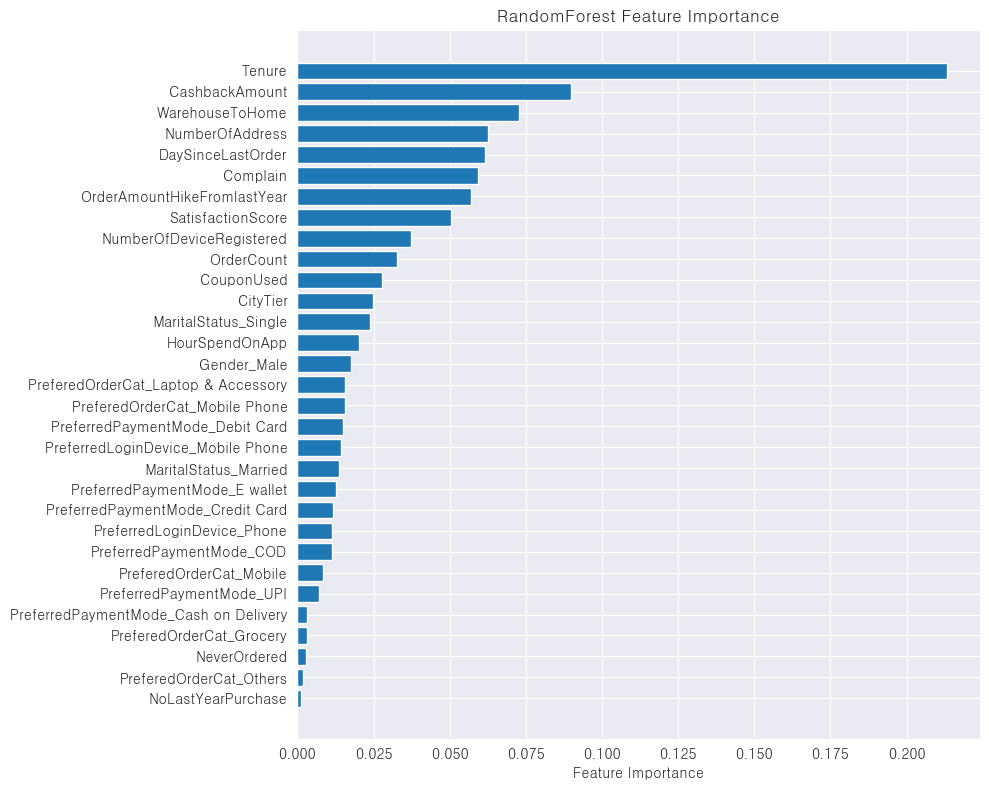

In [85]:
# RandomForest Î™®Îç∏Ïùò ÏòàÏ∏° - ÌäπÏÑ±Î≥Ñ Ï§ëÏöîÎèÑ

# ÌäπÏÑ± Ïù¥Î¶ÑÍ≥º Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = rf.feature_importances_
features = X_train.columns

# Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("RandomForest Feature Importance")
plt.tight_layout()
plt.show()

## xgboost

In [86]:
# xgboost Í∏∞Î≥∏ Î≤ÑÏ†Ñ

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost Î™®Îç∏ ÏÑ†Ïñ∏
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# ÌïôÏäµ
xgb.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = xgb.predict(X_test)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä XGBoost (Standard Scaling)")
print(f"accuracy: {xgb.score(X_test, y_test)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

üìä XGBoost (Standard Scaling)
accuracy: 0.9875666074600356
f1 score: 0.9627659574468085
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 0.9526315789473684
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.97      0.95      0.96       190

    accuracy                           0.99      1126
   macro avg       0.98      0.97      0.98      1126
weighted avg       0.99      0.99      0.99      1126



In [94]:
# ÏòàÏ∏°
y_pred = xgb.predict(X_test)
threshold = 0.022
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
y_pred1 = (y_pred_proba > threshold).astype(int)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä XGBoost (Standard Scaling)")
print(f"accuracy: {xgb.score(X_test, y_test)}")
print(f"f1 score: {f1_score(y_test, y_pred1)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred1)}")
print(classification_report(y_test, y_pred1)) # random forestÏóêÏÑú threshold ÏßÄÏ†ïÌñàÏùÑÎïåÎ≥¥Îã§Îäî Í∑∏ÎûòÎèÑ ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú precisionÏù¥ 0.92Î°ú ÎÜíÏùÄÌé∏

üìä XGBoost (Standard Scaling)
accuracy: 0.9875666074600356
f1 score: 0.7421875
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 1.0
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       936
           1       0.59      1.00      0.74       190

    accuracy                           0.88      1126
   macro avg       0.80      0.93      0.83      1126
weighted avg       0.93      0.88      0.89      1126



In [187]:
joblib.dump(xgb, 'models/xgboost_model(threshold=0.022).pkl')

['models/xgboost_model(threshold=0.022).pkl']

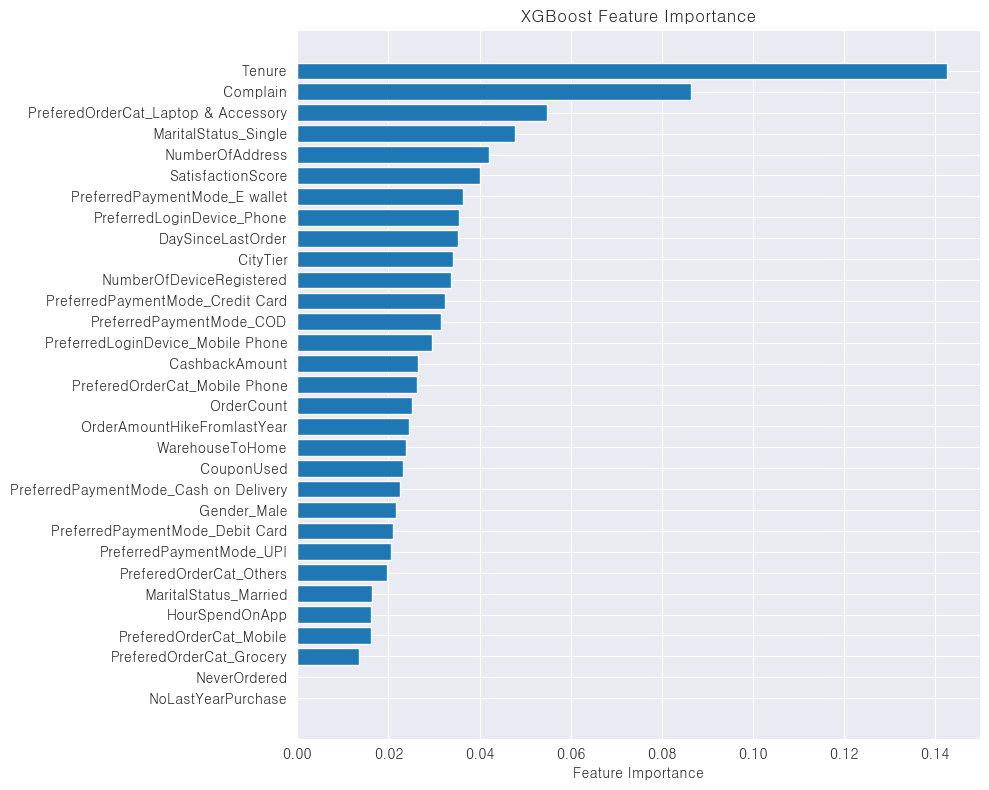

In [96]:
# XGBoost Î™®Îç∏Ïùò ÏòàÏ∏° - ÌäπÏÑ±Î≥Ñ Ï§ëÏöîÎèÑ

# ÌäπÏÑ± Ïù¥Î¶ÑÍ≥º Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = xgb.feature_importances_
features = X_train.columns

# Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

## KNC

In [97]:
# knc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# knc Î™®Îç∏ ÏÑ†Ïñ∏

for i in range(5,56,10): # kncÎäî n_neighborsÏàòÏóê ÎØºÍ∞êÌïú Î™®Îç∏Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, 5Í∞ú Ï†ïÎèÑÎßå ÌÖåÏä§Ìä∏
    knc = KNeighborsClassifier(n_neighbors=i)

    # ÌïôÏäµ
    knc.fit(X_train, y_train)

    # ÏòàÏ∏°
    y_pred = knc.predict(X_test)

# Í≤∞Í≥º Ï∂úÎ†•
    print(f"üìä knc (Standard Scaling) - neighbors:{i}")
    print(classification_report(y_test, y_pred))

üìä knc (Standard Scaling) - neighbors:5
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       936
           1       0.82      0.58      0.68       190

    accuracy                           0.91      1126
   macro avg       0.87      0.78      0.81      1126
weighted avg       0.90      0.91      0.90      1126

üìä knc (Standard Scaling) - neighbors:15
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       936
           1       0.77      0.34      0.47       190

    accuracy                           0.87      1126
   macro avg       0.83      0.66      0.70      1126
weighted avg       0.86      0.87      0.85      1126

üìä knc (Standard Scaling) - neighbors:25
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       936
           1       0.80      0.29      0.43       190

    accuracy                           0.87      1126


In [102]:
# knc ÏñëÏÑ± ÌÅ¥ÎûòÏä§ Ïû¨ÌòÑÏú® ÎÜíÏù∏ Î≤ÑÏ†Ñ (neighbors ÏàòÎäî Ï†ïÌôïÎèÑÍ∞Ä Í∑∏ÎÇòÎßà ÎÜíÏùÄ 5Î°ú Í≥†Ï†ï)

# knc Î™®Îç∏ ÏÑ†Ïñ∏

knc = KNeighborsClassifier(n_neighbors=5)

# ÌïôÏäµ
knc.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = knc.predict(X_test)

threshold = 0.003 # Ïù¥Ï†ïÎèÑÎ°ú ÎÇÆÏ∂∞ÎèÑ ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recallÏù¥ 1Ïù¥ ÎêòÏßÄ ÏïäÏùå.
y_pred_proba = knc.predict_proba(X_test)[:, 1]
y_pred1 = (y_pred_proba > threshold).astype(int)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä knc (Standard Scaling)")
print(classification_report(y_test, y_pred1))

üìä knc (Standard Scaling)
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       936
           1       0.46      0.96      0.62       190

    accuracy                           0.80      1126
   macro avg       0.72      0.87      0.74      1126
weighted avg       0.90      0.80      0.83      1126



In [188]:
joblib.dump(knc, 'models/knc_model(threshold=0.003).pkl')

['models/knc_model(threshold=0.003).pkl']

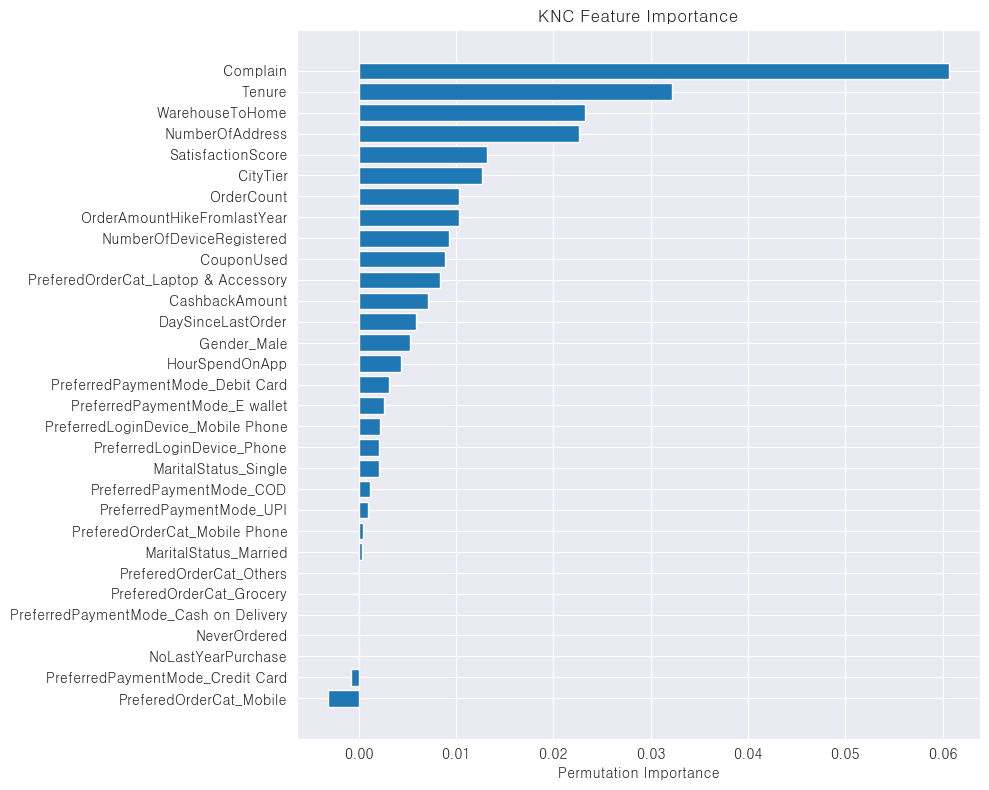

In [104]:
from sklearn.inspection import permutation_importance
# permutation importance Í≥ÑÏÇ∞
result = permutation_importance(
    knc, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# ÌäπÏÑ± Ï§ëÏöîÎèÑ Ï†ïÎ†¨
importances = result.importances_mean
indices = np.argsort(importances)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.title("KNC Feature Importance")
plt.tight_layout()
plt.show()

## SVC

In [105]:
# svc Í∏∞Î≥∏

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# svc Î™®Îç∏ ÏÑ†Ïñ∏

for i in ['linear', 'rbf']: # Ïª§ÎÑê Ï†ïÎèÑÎßå ÌÖåÏä§Ìä∏
    svc = SVC(kernel=i, random_state=42, probability=True)

# ÌïôÏäµ
    svc.fit(X_train, y_train)

# ÏòàÏ∏°
    y_pred = svc.predict(X_test)

# Í≤∞Í≥º Ï∂úÎ†•
    print(f"üìä SVC (Standard Scaling) - kernel: {i}")
    print(classification_report(y_test, y_pred))

üìä SVC (Standard Scaling) - kernel: linear
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       936
           1       0.75      0.53      0.62       190

    accuracy                           0.89      1126
   macro avg       0.83      0.74      0.78      1126
weighted avg       0.88      0.89      0.88      1126

üìä SVC (Standard Scaling) - kernel: rbf
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       936
           1       0.87      0.51      0.64       190

    accuracy                           0.90      1126
   macro avg       0.89      0.75      0.79      1126
weighted avg       0.90      0.90      0.89      1126



In [108]:
# svc Î™®Îç∏Î°ú ÏñëÏÑ± ÌÅ¥ÎûòÏä§ Ïû¨ÌòÑÏú® ÎÜíÏù∏ Î≤ÑÏ†Ñ
# Í∏∞Î≥∏ Î≤ÑÏ†ÑÏóêÏÑú Í∑∏ÎÇòÎßà accuracy ÎÜíÏïòÎçò rbf kernalÎ°ú Í≥†Ï†ï

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# svc Î™®Îç∏ ÏÑ†Ïñ∏

svc = SVC(kernel='rbf', random_state=42, probability=True)

# ÌïôÏäµ
svc.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = svc.predict(X_test)

threshold = 0.025 # Ïù¥Ï†ïÎèÑ ÎÇÆÏ∂∞ÎèÑ ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall Ï†êÏàòÍ∞Ä 0.97ÍπåÏßÄ Î∞ñÏóê Ïïà Ïò¨ÎùºÍ∞ê.
y_pred_proba = svc.predict_proba(X_test)[:, 1]
y_pred1 = (y_pred_proba > threshold).astype(int)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä SVC (Standard Scaling) - rbf")
print(classification_report(y_test, y_pred1))

üìä SVC (Standard Scaling) - rbf
              precision    recall  f1-score   support

           0       0.98      0.33      0.49       936
           1       0.23      0.97      0.37       190

    accuracy                           0.44      1126
   macro avg       0.61      0.65      0.43      1126
weighted avg       0.86      0.44      0.47      1126



In [189]:
joblib.dump(svc, 'models/svc_model(threshold=0.025).pkl')

['models/svc_model(threshold=0.025).pkl']

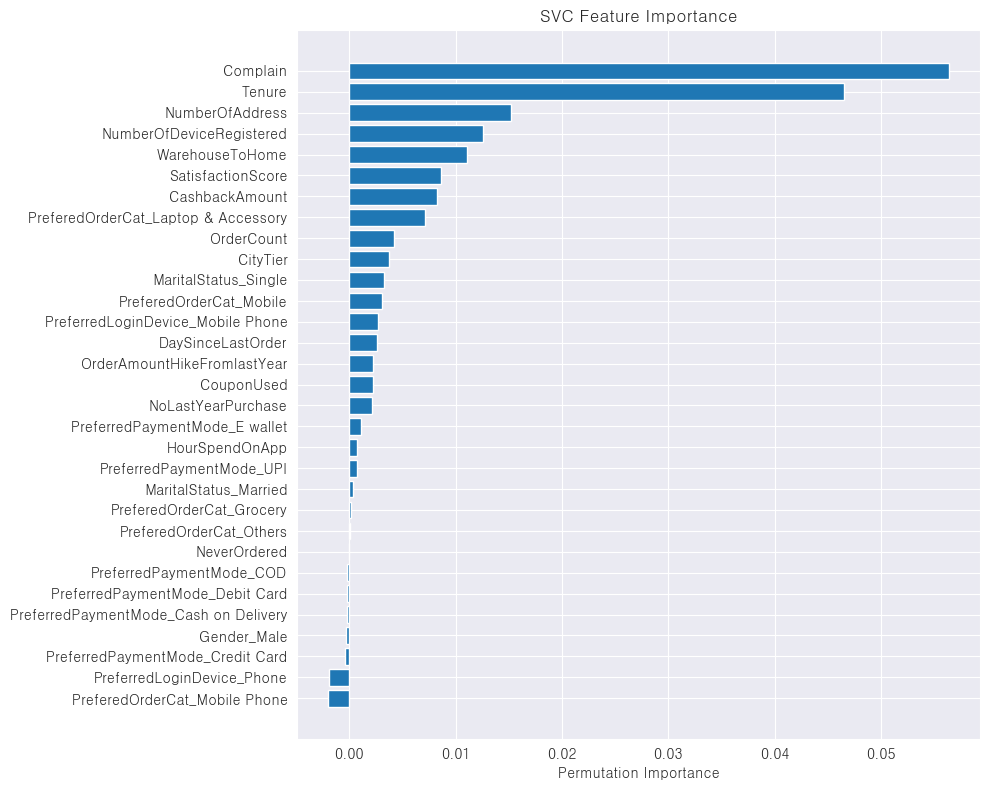

In [110]:
# permutation importance Í≥ÑÏÇ∞
result = permutation_importance(
    svc, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# ÌäπÏÑ± Ï§ëÏöîÎèÑ Ï†ïÎ†¨
importances = result.importances_mean
indices = np.argsort(importances)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.title("SVC Feature Importance")
plt.tight_layout()
plt.show()

## HistGradientBoosting

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(
    random_state=42,
    max_iter=5000, # ÏïΩ ÌïôÏäµÍ∏∞Ïùò Í∞úÏàò
    verbose=2
)

hgb_clf.fit(X_train, y_train)
y_pred = hgb_clf.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))



Binning 0.001 GB of training data: 0.021 s
Fitting gradient boosted rounds:
[1/5000] 1 tree, 31 leaves, max depth = 10, in 0.005s
[2/5000] 1 tree, 31 leaves, max depth = 9, in 0.008s
[3/5000] 1 tree, 31 leaves, max depth = 9, in 0.005s
[4/5000] 1 tree, 31 leaves, max depth = 8, in 0.004s
[5/5000] 1 tree, 31 leaves, max depth = 9, in 0.005s
[6/5000] 1 tree, 31 leaves, max depth = 9, in 0.005s
[7/5000] 1 tree, 31 leaves, max depth = 10, in 0.005s
[8/5000] 1 tree, 31 leaves, max depth = 10, in 0.004s
[9/5000] 1 tree, 31 leaves, max depth = 10, in 0.005s
[10/5000] 1 tree, 31 leaves, max depth = 10, in 0.004s
[11/5000] 1 tree, 31 leaves, max depth = 10, in 0.005s
[12/5000] 1 tree, 31 leaves, max depth = 9, in 0.004s
[13/5000] 1 tree, 31 leaves, max depth = 9, in 0.006s
[14/5000] 1 tree, 31 leaves, max depth = 11, in 0.007s
[15/5000] 1 tree, 31 leaves, max depth = 9, in 0.005s
[16/5000] 1 tree, 31 leaves, max depth = 10, in 0.005s
[17/5000] 1 tree, 31 leaves, max depth = 10, in 0.004s
[18/50

In [32]:
# hist Î™®Îç∏ÏóêÏÑú threshold ÏßÄÏ†ï Î≤ÑÏ†Ñ

threshold = 0.0004
y_pred_proba = hgb_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba > threshold).astype(int)

print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

test accuracy: 0.9831261101243339
f1 score: 0.9523809523809523
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 1.0
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       936
           1       0.91      1.00      0.95       190

    accuracy                           0.98      1126
   macro avg       0.95      0.99      0.97      1126
weighted avg       0.98      0.98      0.98      1126



In [190]:
joblib.dump(hgb_clf, 'models/hgb_model(threshold=0.0004).pkl')

['models/hgb_model(threshold=0.0004).pkl']

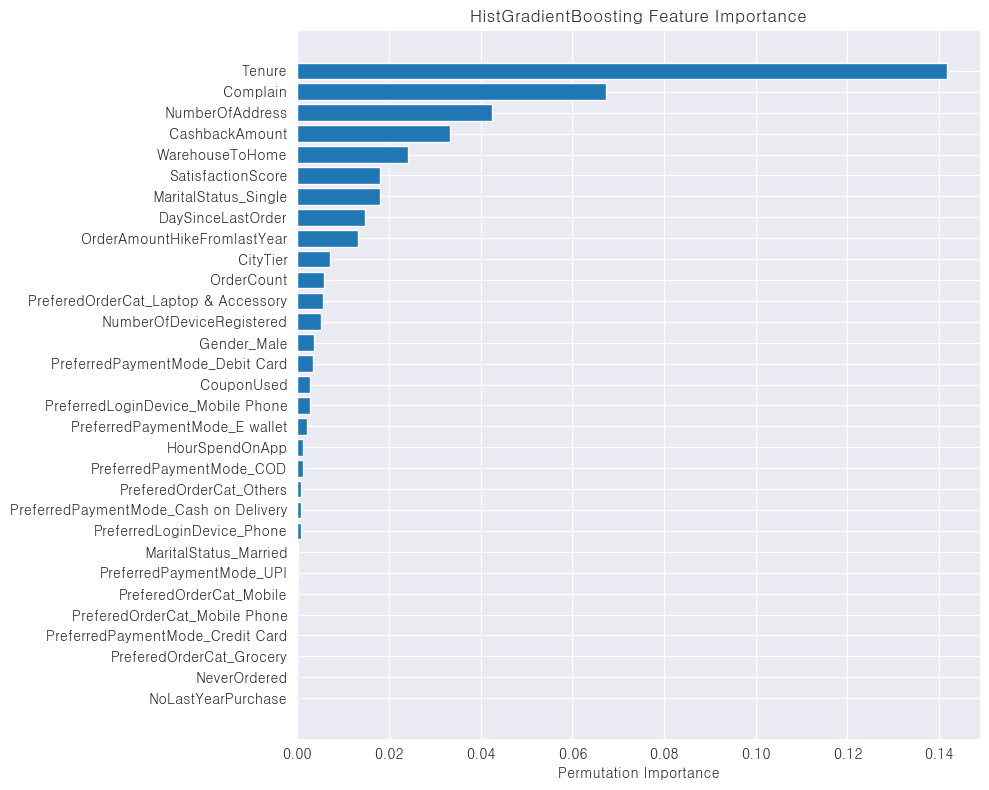

In [112]:
# histÎäî featrue importance ÏßÄÏõê ÏïàÌï¥ÏÑú, ÏÑ±Îä• Í∏∞Ï§Ä permutation importanceÎ°ú ÌäπÏÑ± Ï§ëÏöîÎèÑ ÌåêÎã®

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as n

# permutation importance Í≥ÑÏÇ∞
result = permutation_importance(
    hgb_clf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# ÌäπÏÑ± Ï§ëÏöîÎèÑ Ï†ïÎ†¨
importances = result.importances_mean
indices = np.argsort(importances)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.title("HistGradientBoosting Feature Importance")
plt.tight_layout()
plt.show()

## Stacking

In [113]:
# stacking Î™®Îç∏
# Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏïòÎçò RandomForestÏôÄ XGBÎ•º BASE Î™®Îç∏Î°ú, Îã®ÏàúÌïú LogisticRegression Î™®Îç∏ÏùÑ ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏Î°ú ÏÑ§Ï†ï

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Î≤†Ïù¥Ïä§ Î™®Îç∏ Ï†ïÏùò
estimators = [
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=42))
]

# Ïä§ÌÉúÌÇπ Î™®Îç∏ Ï†ïÏùò (Î©îÌÉÄ Î™®Îç∏: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False,  # ÏõêÎ≥∏ ÌäπÏÑ±ÎèÑ Ìï®Íªò Ï†ÑÎã¨
    cv=5,
    n_jobs=-1
)

# ÌïôÏäµ
stack_model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = stack_model.predict(X_test)

# ÌèâÍ∞Ä
print("üìä Stacking Model (XGBoost + RandomForest)")
print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

üìä Stacking Model (XGBoost + RandomForest)
test accuracy: 0.9884547069271759
f1 score: 0.9653333333333334
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 0.9526315789473684
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       936
           1       0.98      0.95      0.97       190

    accuracy                           0.99      1126
   macro avg       0.98      0.97      0.98      1126
weighted avg       0.99      0.99      0.99      1126



In [117]:

threshold = 0.065
y_pred_proba = stack_model.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba > threshold).astype(int)

# ÌèâÍ∞Ä
print("üìä Stacking Model (XGBoost + RandomForest)")
print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

üìä Stacking Model (XGBoost + RandomForest)
test accuracy: 0.9538188277087034
f1 score: 0.8796296296296297
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 1.0
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       936
           1       0.79      1.00      0.88       190

    accuracy                           0.95      1126
   macro avg       0.89      0.97      0.93      1126
weighted avg       0.96      0.95      0.96      1126



In [191]:
joblib.dump(stack_model, 'models/stack_model(threshold=0.065).pkl')

['models/stack_model(threshold=0.065).pkl']

## Voting Î™®Îç∏

In [119]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# 1. Î™®Îç∏ Ï†ïÏùò
voting_model = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='soft',  # ÌôïÎ•† Í∏∞Î∞òÏúºÎ°ú Ìà¨Ìëú
    n_jobs=-1
)

# 2. ÌïôÏäµ
voting_model.fit(X_train, y_train)

# 3. ÏòàÏ∏°
y_pred = voting_model.predict(X_test)

# 4. ÌèâÍ∞Ä
print("üìä Voting Model (XGBoost + RandomForest)")
print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

üìä Voting Model (XGBoost + RandomForest)
test accuracy: 0.9884547069271759
f1 score: 0.9653333333333334
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 0.9526315789473684
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       936
           1       0.98      0.95      0.97       190

    accuracy                           0.99      1126
   macro avg       0.98      0.97      0.98      1126
weighted avg       0.99      0.99      0.99      1126



In [121]:

# 3. ÏòàÏ∏°
threshold = 0.137
y_pred_proba = voting_model.predict_proba(X_test)[:, 1]  # ÌÅ¥ÎûòÏä§ 1 ÌôïÎ•†
y_pred = (y_pred_proba > threshold).astype(int)

# 4. ÌèâÍ∞Ä
print("üìä Voting Model (XGBoost + RandomForest)")
print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

üìä Voting Model (XGBoost + RandomForest)
test accuracy: 0.9467140319715808
f1 score: 0.8636363636363636
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 1.0
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       936
           1       0.76      1.00      0.86       190

    accuracy                           0.95      1126
   macro avg       0.88      0.97      0.92      1126
weighted avg       0.96      0.95      0.95      1126



In [192]:
joblib.dump(voting_model, 'models/voting_model(threshold=0.137).pkl')

['models/voting_model(threshold=0.137).pkl']

## LGB

In [126]:

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# 1. Î™®Îç∏ ÏÑ†Ïñ∏
lgbm = LGBMClassifier(random_state=42)

# 2. Î™®Îç∏ ÌïôÏäµ
lgbm.fit(X_train, y_train)

# 3. Í∏∞Î≥∏ ÏòàÏ∏° (threshold = 0.5)
y_pred = lgbm.predict(X_test)
print("üìä LightGBM (Default Threshold)")
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# 4. threshold Ï°∞Ï†ï
threshold = 0.135
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_pred_proba > threshold).astype(int)

print("\nüìä LightGBM (Adjusted Threshold)")
print(f"accuracy: {accuracy_score(y_test, y_pred_thresh)}")
print(f"f1 score: {f1_score(y_test, y_pred_thresh)}")
print(f"ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: {recall_score(y_test, y_pred_thresh)}")
print(classification_report(y_test, y_pred_thresh))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 758, number of negative: 3746
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168295 -> initscore=-1.597760
[LightGBM] [Info] Start training from score -1.597760
üìä LightGBM (Default Threshold)
accuracy: 0.9804618117229129
f1 score: 0.9398907103825137
ÏñëÏÑ± ÌÅ¥ÎûòÏä§ recall: 0.9052631578947369
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.98      0.91      0.94       190

    accuracy                           0.98      1126
   macro avg       0.98      0.95      0.96      1126
weighted avg       0.98

In [193]:
joblib.dump(lgbm, 'models/lgbm(threshold=0.135).pkl')

['models/lgbm(threshold=0.135).pkl']

## Gradient Boosting

In [134]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42, max_depth=7, n_estimators= 119)

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
gb_clf.score(X_test, y_test)
print(f"test accuracy score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

test accuracy score: 0.9849023090586145
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       936
           1       0.98      0.93      0.95       190

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126



### ÏµúÍ≥†Ï†êÏàò : gradient boosting (threshold ÏßÄÏ†ï Î≤ÑÏ†Ñ)

In [149]:
# threshold ÏßÄÏ†ï Î≤ÑÏ†Ñ

gb_clf = GradientBoostingClassifier(random_state=42, max_depth=7, n_estimators= 119)

gb_clf.fit(X_train, y_train)

threshold = 0.134
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > threshold).astype(int)

print(f"accuracy score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

accuracy score: 0.9902309058614565
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       936
           1       0.95      1.00      0.97       190

    accuracy                           0.99      1126
   macro avg       0.97      0.99      0.98      1126
weighted avg       0.99      0.99      0.99      1126



In [195]:
joblib.dump(gb_clf, 'models/gb_model(threshold=0.134).pkl')

['models/gb_model(threshold=0.134).pkl']

## Îî•Îü¨Îãù Î™®Îç∏ ÌÖåÏä§Ìä∏

In [154]:
X_train_np = X_train.astype(float).to_numpy()
X_test_np = X_test.astype(float).to_numpy()

X_train1 = torch.tensor(X_train_np, dtype=torch.float)
X_test1 = torch.tensor(X_test_np, dtype=torch.float)
y_train1 = torch.tensor(y_train.to_numpy(), dtype=torch.float).reshape(-1,1)
y_test1 = torch.tensor(y_test.to_numpy(), dtype=torch.float).reshape(-1,1)

In [155]:
class classification(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),   # Ï∂îÍ∞Ä
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),       # Ï∂îÍ∞Ä
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)


model = classification(X_train1.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00085)

In [156]:
model.train()
epochs = 15000

for epochs in range(epochs):
    optimizer.zero_grad()
    logits = model(X_train1)
    loss = criterion(logits, y_train1)
    loss.backward()
    optimizer.step()

    if epochs % 1000 == 0:
        print(f"epoch: {epochs}, loss: {loss}")

epoch: 0, loss: 0.6440914273262024
epoch: 1000, loss: 0.0008191057713702321
epoch: 2000, loss: 0.00012760530808009207
epoch: 3000, loss: 7.346268830588087e-05
epoch: 4000, loss: 5.0394948630128056e-05
epoch: 5000, loss: 1.5570745745208114e-05
epoch: 6000, loss: 7.605803148180712e-06
epoch: 7000, loss: 1.2817728929803707e-05
epoch: 8000, loss: 3.2296440622303635e-05
epoch: 9000, loss: 7.8425418905681e-06
epoch: 10000, loss: 2.8940480660821777e-06
epoch: 11000, loss: 2.6510783754929435e-06
epoch: 12000, loss: 3.213684613001533e-05
epoch: 13000, loss: 1.3285799468576442e-05
epoch: 14000, loss: 5.304593651089817e-05


In [172]:
model.eval()

with torch.no_grad():
    logits = model(X_test1)
    y_pred_proba = nn.Sigmoid()(logits)
    y_pred = (y_pred_proba > 0.5).numpy().astype(int)
    print(f"accuracy score: {accuracy_score(y_test1, y_pred)}")
    print(classification_report(y_test1, y_pred))

accuracy score: 0.9724689165186501
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       936
         1.0       0.91      0.93      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



In [196]:
torch.save(model, 'models/deeplearning_model.pth')